In [227]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [228]:
train_data = pd.read_csv("titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [229]:
train_data_two = train_data

<Axes: >

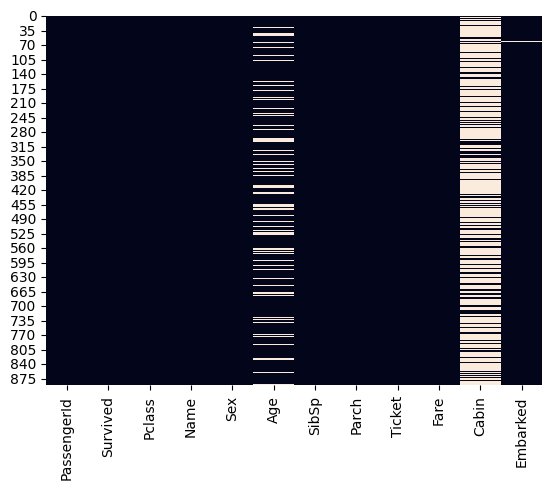

In [230]:
sns.heatmap(train_data_two.isnull(), cbar=False)

In [231]:
train_data_two['Cabin'].describe()
train_data_two['Cabin'].value_counts()



Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [232]:
train_data_two['Cabin'].isna().sum()


687

In [233]:
train_data_two['Age'].replace(np.nan, train_data_two['Age'].median(), inplace=True)
train_data_two = train_data_two.drop(['Cabin'], axis=1)
train_data_two = train_data_two.drop(['Embarked'], axis=1)
train_data_two = train_data_two.drop(['Name'], axis=1)
train_data_two = train_data_two.drop(['Ticket'], axis=1)



<Axes: >

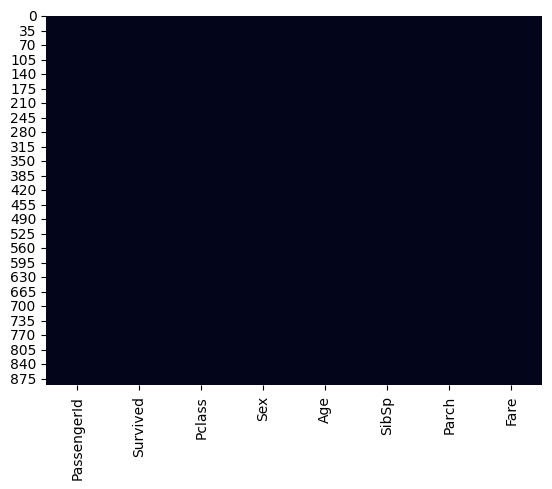

In [234]:
sns.heatmap(train_data_two.isnull(), cbar=False)

/var/folders/jf/q07px8rj4h38cnh8l50p4lvh0000gn/T/ipykernel_16879/1697611412.py:1: UserWarning: The palette list has more values (34) than needed (2), which may not be intended.
  sns.barplot(x=train_data_two['Sex'], y=train_data_two['Survived'], hue = train_data_two['Sex'], legend = False, palette=sns.color_palette("husl", 34))


<Axes: xlabel='Sex', ylabel='Survived'>

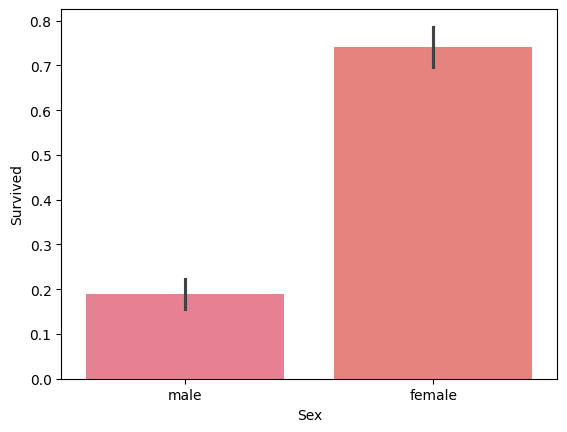

In [235]:
sns.barplot(x=train_data_two['Sex'], y=train_data_two['Survived'], hue = train_data_two['Sex'], legend = False, palette=sns.color_palette("husl", 34))


In [236]:
len(train_data_two)

891

In [237]:
test_data = pd.read_csv("titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [238]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [239]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


<Axes: >

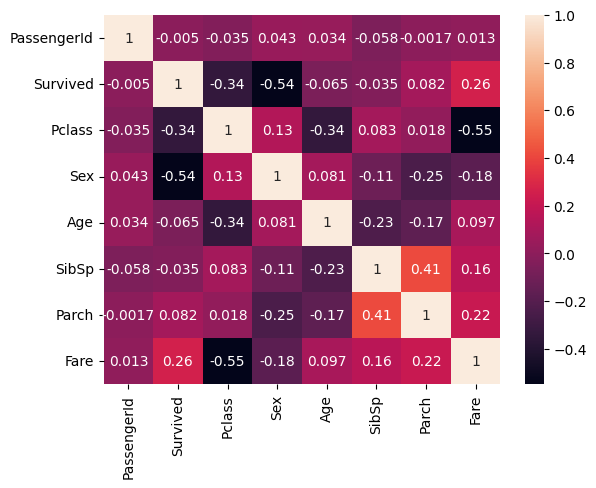

In [240]:

train_data_two['Sex'] = train_data_two['Sex'].replace(['female','male'],[0,1])
sns.heatmap(train_data_two.corr(), annot=True)